<a href="https://colab.research.google.com/github/pritiyadav888/Machine-Learning-Projects/blob/main/IoT_NN_TF_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:

import warnings
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# from sklearn.decomposition.truncated_svd import TruncatedSVD   
# Construct some pipelines
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier


In [80]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predictive_Data/alldata (1).csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
data = data._convert(numeric=True)

In [82]:
#Using Pearson Correlation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cormat = data.corr()
round(cormat,2)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.00,-0.01,-0.35,-0.00,-0.30,-0.00,0.91,0.01,-0.35,0.01,-0.29,0.00,1.00,-0.01,-0.05,0.00,-0.05,0.01,0.92,0.00,0.10,0.00,-0.23,0.00,-0.00,-0.01,-0.00,0.00,0.00,0.86,-0.00,-0.38,-0.01,-0.25,-0.00,-0.47,0.00,0.34,0.00,0.01,0.00,0.86,-0.01,-0.05,0.00,-0.05,0.00,-0.47,0.00,-0.17,0.00,0.42,0.00,-0.00,-0.01,0.00,0.01,0.00,0.86,-0.00,-0.38,-0.00,-0.25,-0.00,-0.46,0.01,0.36,0.01,-0.00,0.01,0.86,-0.00,-0.05,0.00,-0.05,0.00,-0.47,0.02,-0.18,-0.00,0.42,-0.00,-0.00,-0.01,-0.01,-0.00,0.00,0.96,0.01,-0.35,0.01,-0.30,0.01,0.89,0.01,-0.35,0.02,-0.28,0.02,0.96,0.01,-0.05,-0.00,-0.05,-0.00,0.90,0.01,0.10,0.00,-0.23,-0.00,-0.00,-0.00,-0.01,0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
R1-PM1:V,-0.01,1.00,0.01,0.78,-0.00,0.79,-0.00,-0.61,0.00,-0.23,-0.00,-0.21,-0.01,0.94,-0.11,-0.80,-0.12,-0.77,-0.00,-0.35,0.01,-0.73,0.01,-0.76,0.15,-0.08,0.13,-0.54,-0.00,0.00,0.55,-0.00,0.25,0.00,0.15,0.01,-0.42,0.01,-0.25,-0.01,-0.22,0.00,0.36,-0.09,-0.67,-0.08,-0.59,0.01,-0.23,-0.00,-0.68,0.01,-0.58,0.15,-0.07,0.10,-0.07,-0.00,0.01,0.50,-0.01,0.18,-0.00,0.09,0.01,-0.27,0.00,0.02,-0.00,-0.04,0.01,0.31,-0.09,-0.67,-0.08,-0.58,0.01,-0.04,-0.00,-0.62,0.00,-0.37,0.15,-0.07,0.05,-0.07,-0.00,0.01,0.53,-0.01,0.34,-0.01,0.36,0.00,-0.28,-0.01,0.05,-0.00,-0.02,0.01,0.46,-0.08,-0.53,-0.07,-0.40,0.00,-0.07,0.01,-0.57,0.01,-0.44,0.15,-0.07,0.01,-0.36,-0.00,0.00,0.00,-0.00,-0.00,0.06,-0.00,-0.16,-0.15,0.00,0.00,-0.01,-0.01
R1-PA2:VH,-0.35,0.01,1.00,0.00,-0.34,0.00,-0.33,-0.00,0.90,0.00,-0.33,0.00,-0.35,0.00,-0.00,-0.01,-0.01,-0.01,-0.33,-0.00,-0.22,-0.01,0.10,-0.01,0.00,0.00,0.00,-0.00,0.02,-0.30,0.01,0.86,0.01,-0.37,0.00,-0.02,-0.00,-0.47,0.00,0.27,0.00,-0.30,0.01,-0.01,-0.01,-0.03,-0.01,-0.02,0.00,0.35,-0.01,-0.16,-0.01,0.00,-0.00,0.00,-0.00,0.02,-0.30,0.00,0.85,0.00,-0.37,-0.00,-0.03,-0.02,-0.47,-0.02,0.29,-0.02,-0.30,0.00,-0.01,-0.01,-0.03,-0.01,-0.03,-0.02,0.34,-0.01,-0.16,-0.00,0.00,-0.00,0.03,0.00,0.02,-0.34,0.01,0.95,0.00,-0.34,0.00,-0.31,-0.02,0.88,-0.02,-0.33,-0.02,-0.34,0.01,-0.00,-0.01,-0.00,-0.01,-0.31,-0.02,-0.20,-0.01,0.08,-0.01,-0.00,0.00,0.00,-0.01,0.02,0.00,0.00,0.00,0.00,-0.01,-0.01,0.00,0.01,0.00,0.01,-0.00,-0.00
R1-PM2:V,-0.00,0.78,0.00,1.00,-0.00,1.00,0.00,-0.35,-0.01,-0.28,-0.00,-0.28,-0.00,0.95,-0.03,-0.25,-0.05,-0.24,0.00,-0.31,0.01,-0.24,0.00,-0.24,0.24,-0.05,0.17,-0.29,0.00,0.01,0.32,-0.01,0.26,0.00,0.23,0.00,-0.34,0.02,-0.30,-0.01,-0.30,0.01,0.29,-0.03,-0.23,-0.03,-0.21,0.00,-0.31,-0.01,-0.23,0.01,-0.20,0.23,-0.06,0.10,0.03,0.00,0.02,0.24,-0.02,0.16,0.00,0.13,0.00,-0.02,0.01,0.10,-0.00,0.08,0.02,0.20,-0.03,-0.23,-0.03,-0.22,0.00,0.11,-0.00,-0.21,0.01,-0.19,0.23,-0.06,0.01,-0.03,-0.00,0.02,0.32,-0.02,0.32,-0.01,0.32,0.01,-0.02,-0.01,0.13,0.00,0.11,0.02,0.34,-0.03,-0.20,-0.03,-0.17,0.01,0.08,0.00,-0

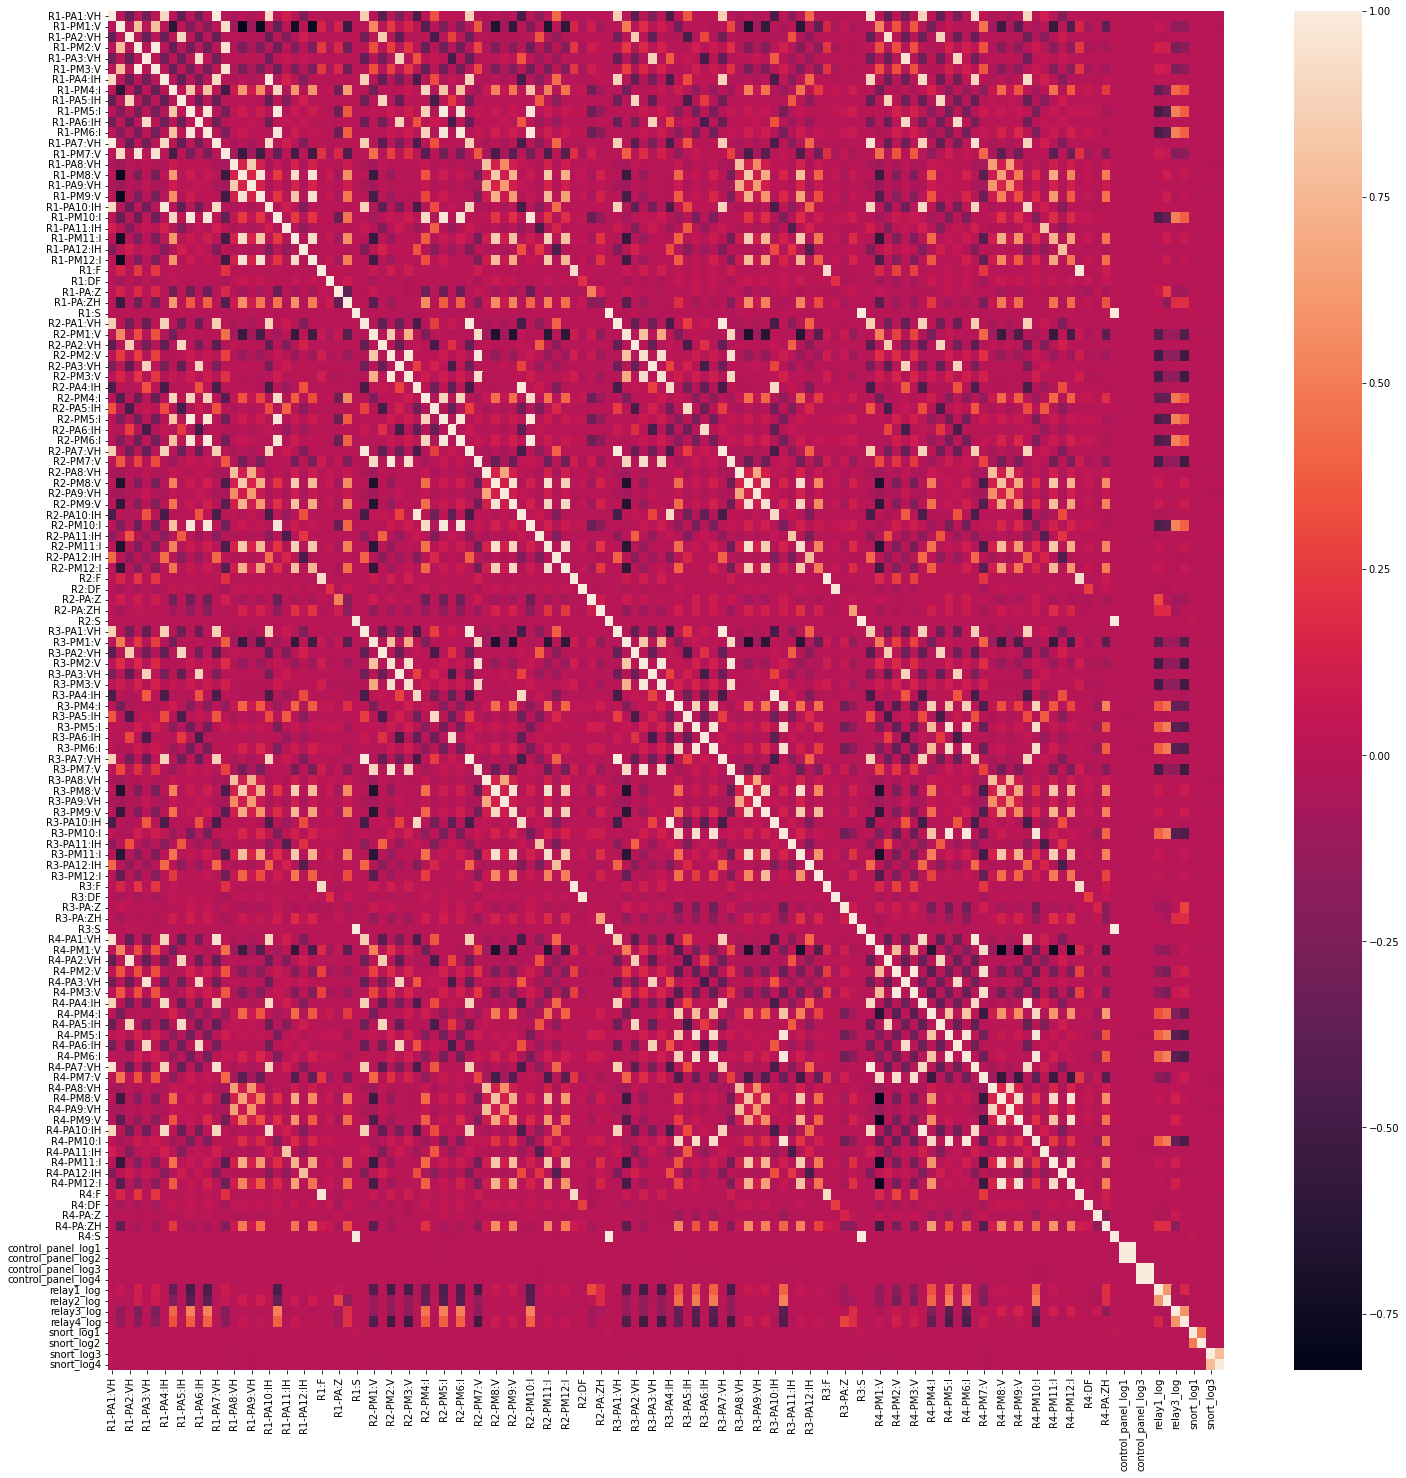

In [83]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
sns.heatmap(cormat);

In [84]:
# data.drop(data.columns[[116,117,118,119,120,121,122,123,124,125,126,127]], axis=1, inplace=True)

In [85]:
data.info

In [86]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [87]:
data.isnull().sum().sum()

In [ ]:
# data = data.dropna(axis=1, how='all')
df = data.dropna()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.columns

In [ ]:
X = df.drop('marker', axis=1)
X.shape

In [ ]:
y = df['marker']
y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 40)

In [ ]:
X_train.shape, y_train.shape

**Random Forest Classifier & Random search cv**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
classifier_rf.oob_score_

In [ ]:
#Predicting the test set result  
y_pred= classifier_rf.predict(X_test) 

In [ ]:
# View accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

In [ ]:
# random forest classifier grid search
from sklearn.model_selection import RandomizedSearchCV
clf_rf = RandomForestClassifier(oob_score=True)
param_grid_rf = {
    'n_estimators': range(100, 500, 100),
    'max_depth': range(30, 50, 10),
    'max_features' : ['sqrt', 'log2'],
    'min_samples_leaf': range(1,15,3),
    'min_samples_split': range(2,10,2),
}
grid_search_rf = RandomizedSearchCV(
    estimator=clf_rf,
    param_distributions=param_grid_rf,
    scoring='accuracy',
    cv=2,
    n_iter=7,
    refit = True,
    verbose = 3
)
grid_search_rf.fit(X_train, y_train)

print(f"Random Forest Best Params: \n{grid_search_rf.best_params_}")
clf_rf_best = grid_search_rf.best_estimator_

#Predicting the test set result  
y_pred= clf_rf_best.predict(X_test) 

#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# View accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

In [ ]:
clf_rf_best.oob_score_

**Neural Network - TensorFlow**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size = .30, random_state = 40)

In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

In [ ]:
# Import the kera modules
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(116,))

# a layer instance is callable on a tensor, and returns a tensor
# To the first layer we are feeding inputs
x = Dense(32, activation='relu')(inputs)
# To the next layer we are feeding the result of previous call here it is h
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# Predictions are the result of the neural network. Notice that the predictions are also having one column.
predictions = Dense(1)(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
# Here the loss function is mse - Mean Squared Error because it is a regression problem.
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=[tf.keras.metrics.Accuracy()],)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping()




In [ ]:
model.fit(X_train, y_train,  epochs=70, batch_size=100)  # starts training


In [ ]:
y_pred = model.predict(X_test)


**SVM & Random search cv**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)


In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
# View accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [ ]:
# View accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

In [ ]:
clf_rf_best.oob_score_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}


In [ ]:
grid_search_rf = RandomizedSearchCV(
    estimator=svclassifier,
    param_distributions=param_distributions,
    scoring='accuracy',
    cv=2,
    n_iter=7,
    refit = True,
    verbose = 3
)
grid_search_rf.fit(X_train, y_train)

In [ ]:
grid_search_rf.best_estimator_

In [ ]:
grid_search_rf.best_estimator_.fit(X_train, y_train)
y_pred = grid_search_rf.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred)


In [ ]:
y_pred = grid_search_rf.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)